In [89]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
data = pd.read_csv("Housing.csv")


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [92]:
data.dropna(inplace=True)


In [93]:
from sklearn.model_selection import train_test_split
x = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [94]:
train_data = x_train.join(y_train)


In [95]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


In [96]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

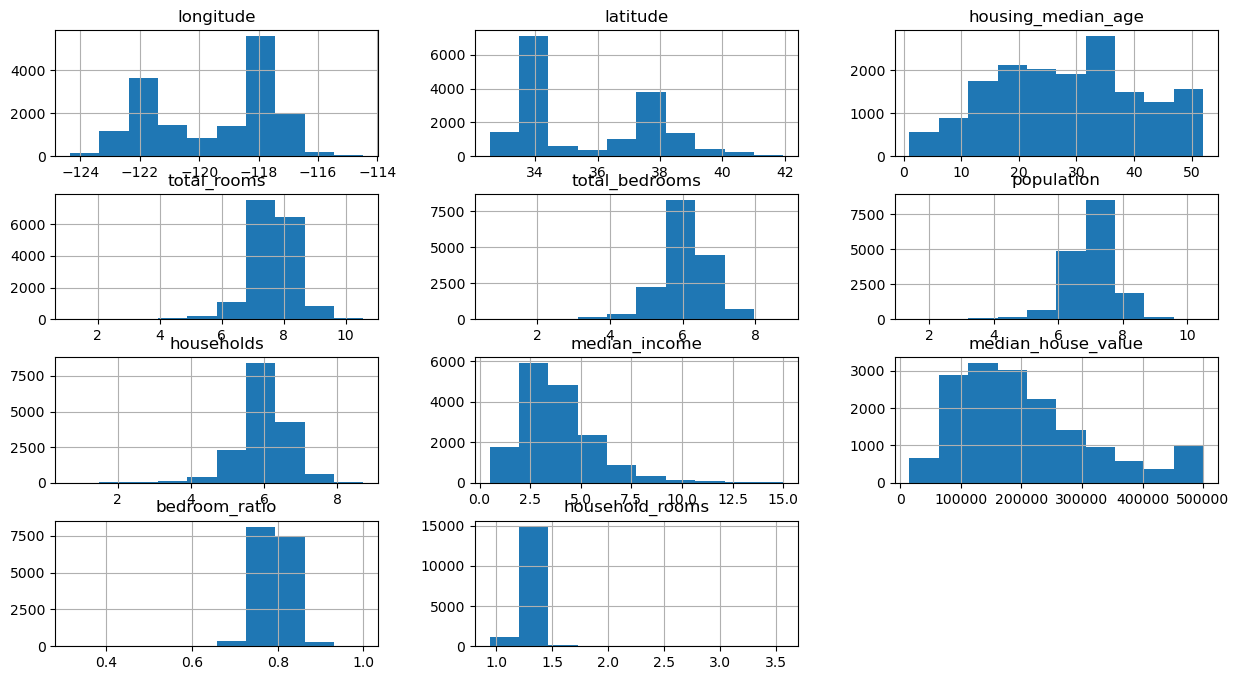

In [97]:
train_data.hist(figsize=(15,8))

<Axes: >

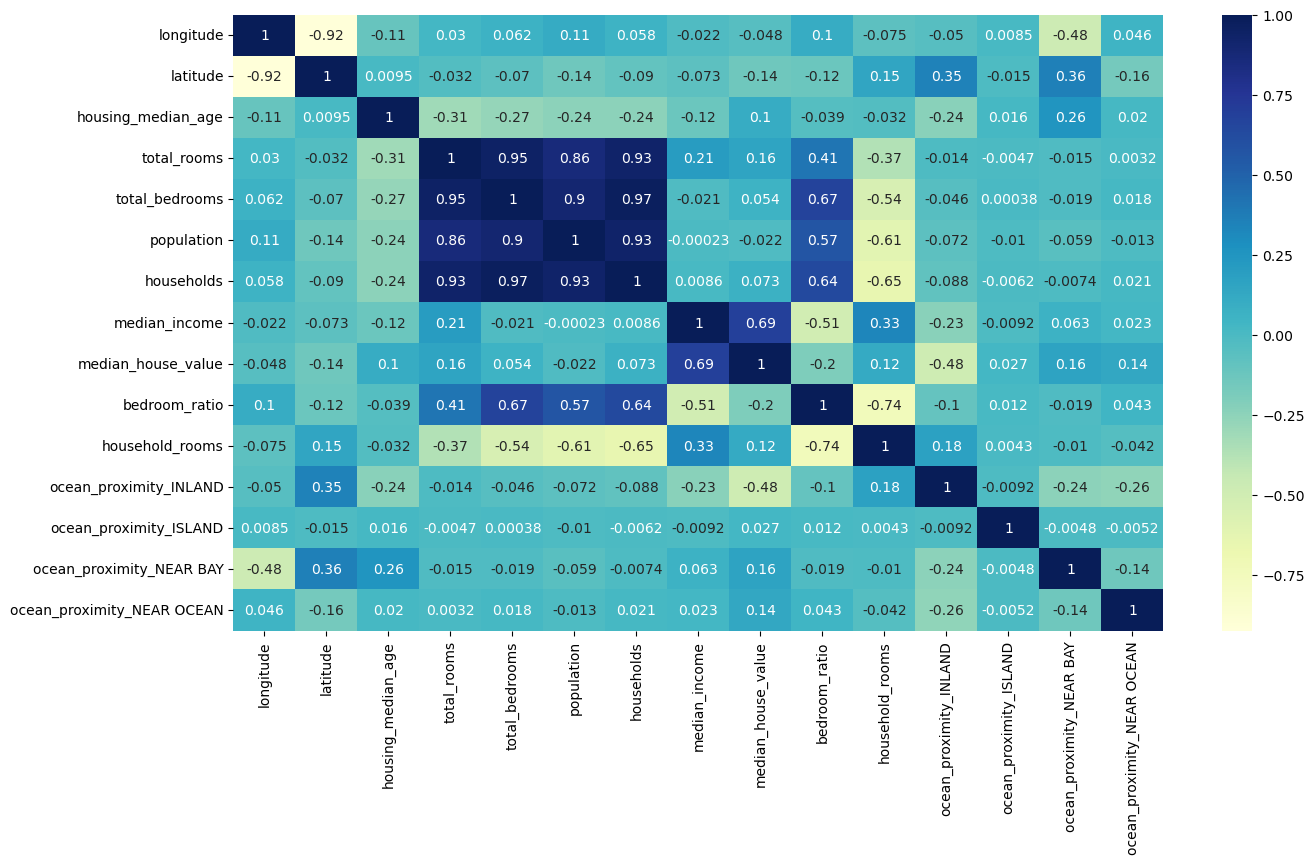

In [98]:

df_encoded = pd.get_dummies(train_data, drop_first=True)

plt.figure(figsize=(15,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="YlGnBu")


In [99]:
train_data = pd.get_dummies(train_data, drop_first=True, dtype=float)


In [100]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,0.813816,1.235350,0.0,0.0,0.0,0.0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0.749416,1.344506,1.0,0.0,0.0,0.0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0.815812,1.246236,1.0,0.0,0.0,0.0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,0.882690,1.142841,0.0,0.0,0.0,0.0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0.794652,1.252109,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,0.776717,1.308200,0.0,0.0,0.0,0.0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,0.800481,1.255281,0.0,0.0,0.0,0.0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,0.801871,1.251124,0.0,0.0,0.0,0.0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0.805704,1.242326,0.0,0.0,1.0,0.0


<Axes: >

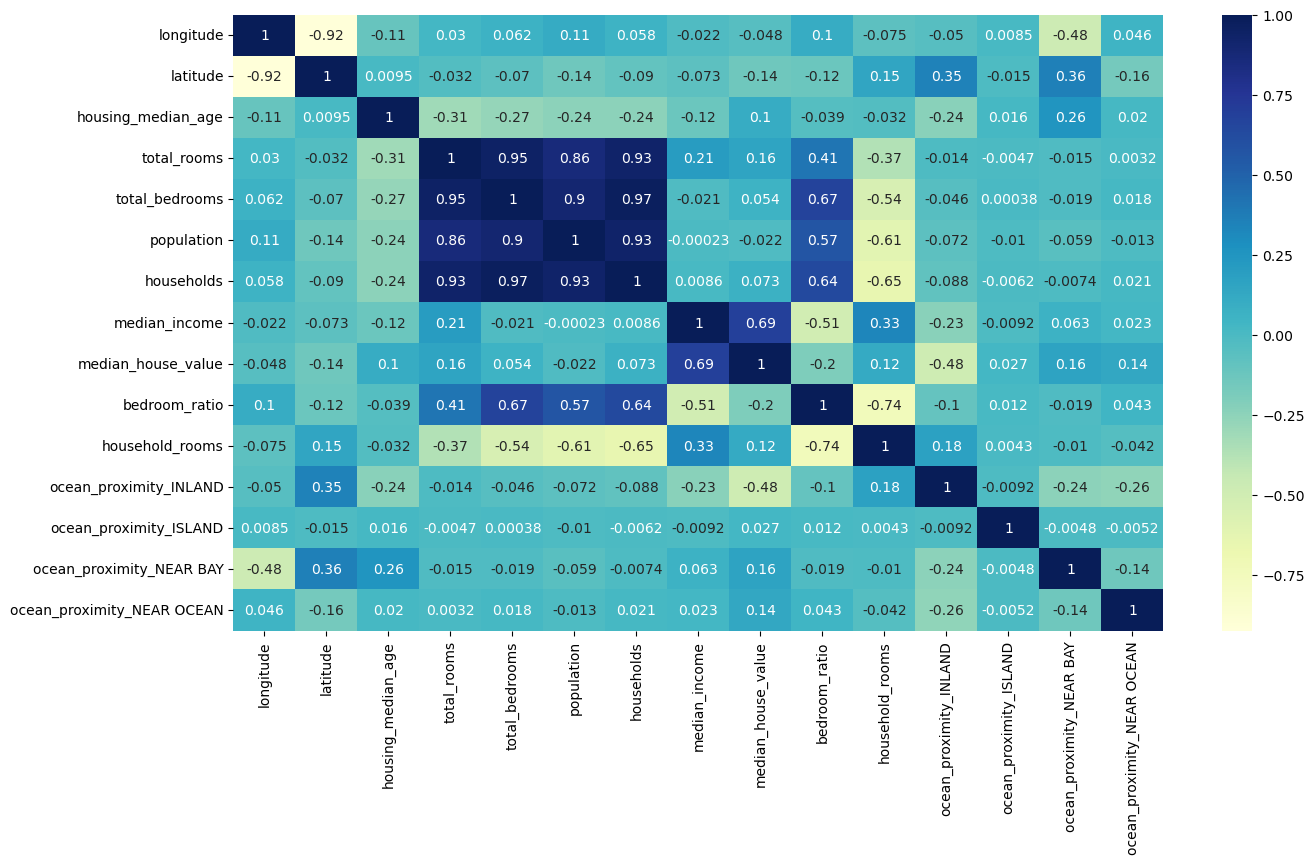

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

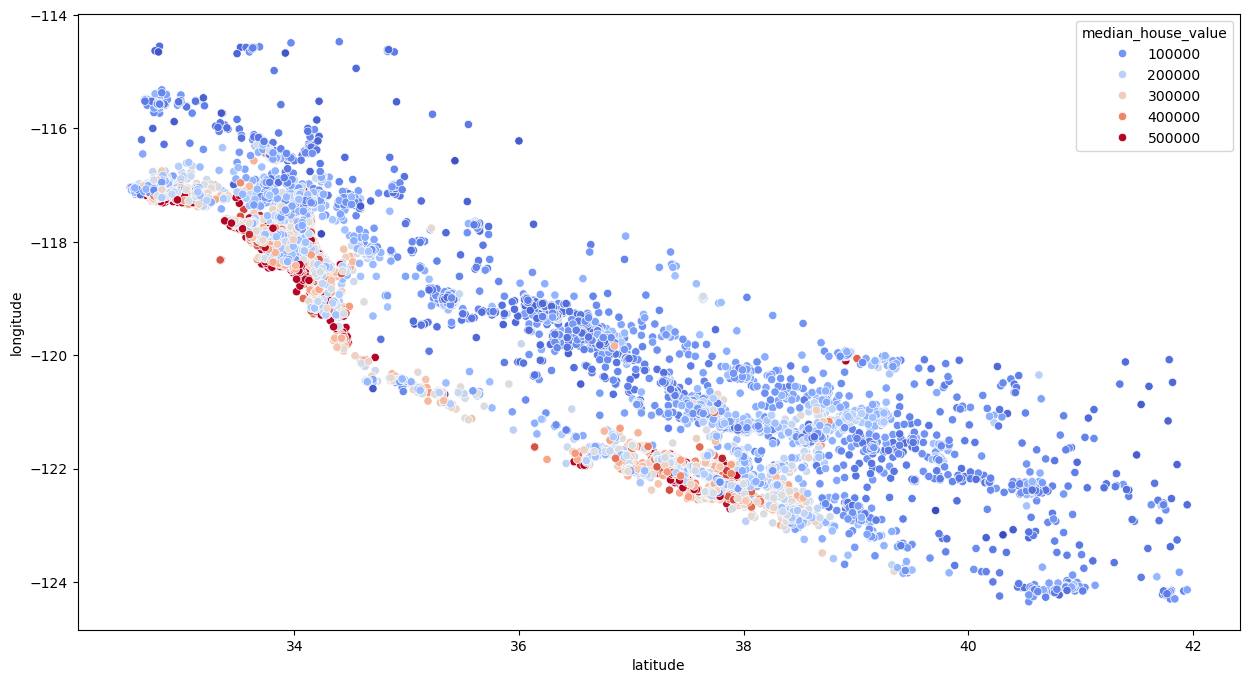

In [102]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')



<Axes: >

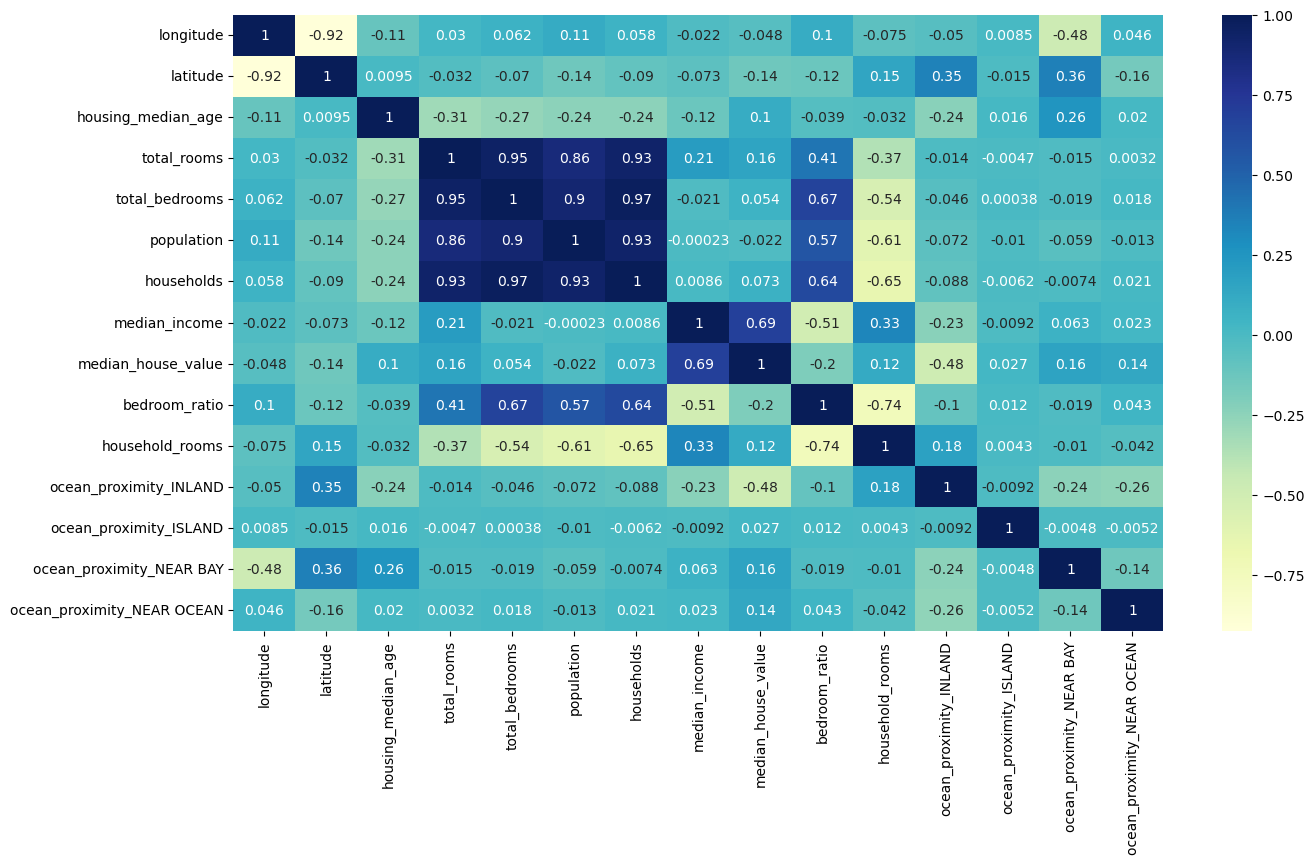

In [103]:
df_encoded = pd.get_dummies(train_data, drop_first=True)

plt.figure(figsize=(15,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="YlGnBu")


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_new = train_data.drop(['median_house_value'], axis=1)
y_train_new = train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train_new)

reg = LinearRegression()
reg.fit(x_train_s, y_train_new)


LinearRegression()

In [105]:
test_data = x_test.join(y_test)
test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)
test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]
test_data = pd.get_dummies(test_data, drop_first=True, dtype=float)


In [106]:
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)


In [107]:
x_test_s = scaler.transform(test_data.drop("median_house_value", axis=1))
y_test_new = test_data["median_house_value"]


In [108]:
reg.score(x_test_s, y_test_new)


0.6687407117584969

In [109]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(x_train_s, y_train_new)


RandomForestRegressor(random_state=42)

In [110]:
forest.score(x_test_s, y_test_new)


0.8188219208000967

In [111]:
from sklearn.model_selection import GridSearchCV

forest_g = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}

grid_search = GridSearchCV(
    forest_g,
    param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    n_jobs = -1
)

grid_search.fit(x_train_s, y_train_new)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [112]:
grid_search.best_estimator_


RandomForestRegressor(n_estimators=300, random_state=42)

In [113]:
grid_search.best_estimator_.score(x_test_s, y_test_new)


0.8215616008296188

In [114]:
def predict_price(lat, long, rooms, beds, population, households, location):
    df = pd.DataFrame([{
        "latitude": lat,
        "longitude": long,
        "total_rooms": np.log(rooms+1),
        "total_bedrooms": np.log(beds+1),
        "population": np.log(population+1),
        "households": np.log(households+1),
        "bedroom_ratio": beds/rooms,
        "household_rooms": rooms/households,
        f"ocean_proximity_{location}": 1
    }])
    df = df.reindex(columns=x_train_new.columns, fill_value=0)
    df_s = scaler.transform(df)
    return grid_search.best_estimator_.predict(df_s)[0]


In [119]:
price = predict_price(3, 118.3, 300, 500, 1500, 800, "ISLAND")
print(f"Predicted Price (Normal): {price:,.2f}")




Predicted Price (Normal): 261,155.92
